In [30]:
import numpy as np
import sympy as sp
import matplotlib.pyplot as plt
from symbolic_hulls import *
from lower_hull import lower_convex_hull

In [31]:
def compute_strain_energy_polynomial(elasTens, v_mol):
    """
    Compute a polynomial representation of the strain energy for 1 mole of material.

    This is achieved by multiplying the strain energy density function (defined as 
    a quadratic form involving the elastic tensor and strain vector) by the molar 
    volume of the material.

    Parameters:
        elasTens (list or array-like): A 6x6 elastic tensor in Voigt notation, representing
                                    the stiffness matrix of the material.
        v_mol (float): The molar volume of the material, in units consistent with the elastic tensor.

    Returns:
        sympy expression: A simplified polynomial expression representing the strain energy
                        as a function of the strain components (e_1, e_2, ..., e_6).
                        Numerical coefficients are rounded to the nearest integer.
    """

    e1, e2, e3, e4, e5, e6 = sp.symbols('e1 e2 e3 e4 e5 e6')
    strain = sp.Matrix([e1, e2, e3, e4, e5, e6])
    elastic_tensor = sp.Matrix(elasTens)
    strain_energy = 0.5 * v_mol * strain.T * elastic_tensor * strain

    strain_energy = sp.simplify(strain_energy)[0]

    return strain_energy.replace(lambda term: term.is_Number, lambda term: int(round(term, 0)))

In [32]:
# bV2O5_eTens =  [[271.8554647757902, 64.62325221396486, 27.224912079571325, -1.7191866738895836, -0.0025286851971816067, -0.002124003],
#                 [64.62325221396486, 197.89991427799202, 12.453223957658249, 2.119618147614496, -0.01514585462756177, -0.00177122],
#                 [27.224912079571325, 12.453223957658249, 33.120429472730564, 2.3253632154077684, -0.04857597532521658, -0.004906421],
#                 [-1.7191866738895836, 2.119618147614496, 2.3253632154077684, 33.84674175649386, 0.012452724999999758, -0.000364988],
#                 [-0.0025286851971816067, -0.01514585462756177, -0.04857597532521658, 0.012452724999999758, 28.376899505970716, -6.704158046],
#                 [-0.002124003437466659, -0.0017712195119971308, -0.0049064205224106806, -0.0003649875000002795, -6.704158045891168, 72.27092569]]

# bV2O5_v_mol = 48.502

# # this is the polynomial representation of the strain energy for 1 mole of bV2O5
# bV2O5_energy = compute_strain_energy_polynomial(bV2O5_eTens, bV2O5_v_mol)

# aV2O5_eTens =  [[266.47365146395515, 43.15159737260626, 119.5698396037316, -0.021969906572240724, -0.008038178036991589, -0.051846511],
#                 [43.15159737260626, 39.321322564273274, 60.251064113829564, -0.23774907491360064, 0.07308114151937194, -0.413241737],
#                 [119.5698396037316, 60.251064113829564, 222.77826373647477, 0.06535684464073953, -0.032256197469259985, 0.056397909],
#                 [-0.021969906572240724, -0.23774907491360064, 0.06535684464073953, 40.92316299266148, 0.0, -9.16E-18],
#                 [-0.008038178036991589, 0.07308114151937194, -0.032256197469259985, 0.0, 44.326459555780836, -1.34E-15],
#                 [-0.05184651084026355, -0.4132417369611278, 0.05639790945728265, -9.162304888641942e-18, -1.3365143026749432e-15, 33.76154876]]

# aV2O5_v_mol = 52.872

# # this is the polynomial representation of the strain energy for 1 mole of aV2O5
# aV2O5_energy = compute_strain_energy_polynomial(aV2O5_eTens, aV2O5_v_mol)

# e1, e2, e3, e4, e5, e6 = sp.symbols('e1 e2 e3 e4 e5 e6')
# e1_p, e2_p, e3_p, e4_p, e5_p, e6_p = sp.symbols('e1_p e2_p e3_p e4_p e5_p e6_p')

# display(aV2O5_energy, bV2O5_energy)

# proj, variables, pvariables = projection_function(bV2O5_energy, aV2O5_energy)
# disc1 = recursive_discriminant(proj, (e1, e2, e3, e4, e5, e6))

# proj, variables, pvariables = projection_function(aV2O5_energy, bV2O5_energy)
# disc2 = recursive_discriminant(proj, (e1, e2, e3, e4, e5, e6))

# display(disc1, disc2)

### Comparisioin of Methods

In [33]:
# aV2O5_energy_func = sp.lambdify((e1, e2, e3, e4, e5, e6), aV2O5_energy, 'numpy')
# aV2O5_energy_vals = aV2O5_energy_func(*space.T)

# bV2O5_energy_func = sp.lambdify((e1, e2, e3, e4, e5, e6), bV2O5_energy, 'numpy')
# bV2O5_energy_vals = bV2O5_energy_func(*space.T)

# bV2O5_points = np.column_stack((space, bV2O5_energy_vals))
# aV205_points = np.column_stack((space, aV2O5_energy_vals))

# points = np.vstack((bV2O5_points, aV205_points))

In [34]:
# # Compute the n-1 dimensional subspace of the convex hull which holds the hull boundries
# e1_points_f1 = sp.solve(disc1, e1_p)
# e1_points_f2 = sp.solve(disc2, e1_p)

In [35]:
points_per_dim = 4
points_1d = np.linspace(0, 0.2, points_per_dim)

# Create a 6D mesh
E1, E2, E3, E4, E5, E6 = np.meshgrid(
    points_1d, points_1d, points_1d,
    points_1d, points_1d, points_1d,
    indexing='ij'
)

space = np.vstack((E1.ravel(), E2.ravel(), E3.ravel(), E4.ravel(), E5.ravel(), E6.ravel())).T

# Create the reduced space mesh
E1, E2, E3, E4, E5 = np.meshgrid(
    points_1d, points_1d, points_1d,
    points_1d, points_1d,
    indexing='ij'
)

subspace = np.vstack((E1.ravel(), E2.ravel(), E3.ravel(), E4.ravel(), E5.ravel())).T

In [48]:
e1, e2, e3, e4, e5, e6 = sp.symbols('e1 e2 e3 e4 e5 e6')
e1_p, e2_p, e3_p, e4_p, e5_p, e6_p = sp.symbols('e1_p e2_p e3_p e4_p e5_p e6_p')

In [37]:
# Let's read some data in
import json

file_path = r'ElasticTensorsV-O.json'

with open(file_path, 'r', encoding='utf-8') as f:
    data = json.load(f)

phase_length = len(data)
# print out the polymorph names in the data set
for i in range(phase_length):
    print(data[i]['name'])

# lets grab only the VO2 polymorphs
VO2_data = [data[i] for i in range(phase_length) if 'VO2' in data[i]['name']]

V
VO
A-VO2_resub
C-V2O3
M2-V3O5_resub
M2-VO2
Delta-V2O5
Beta-V2O5
M1-VO2
Alpha-V2O5
R-VO2


In [38]:
# Grab all pairs of polymorphs by index
import itertools
index_list = list(itertools.combinations(list(range(0, len(VO2_data))), 2))
print('The number of polymorph pairs is', len(index_list))
print('The number of points in the full space is', points_per_dim**6)
print('The number of points in the reduced space is', len(index_list)*points_per_dim**5)

The number of polymorph pairs is 6
The number of points in the full space is 4096
The number of points in the reduced space is 6144


In [39]:
# Compute the tangent boundries between phase pairs, and add the points along the boundry to the total hull
points = np.empty((0, 6))
# for pair in index_list:
pair = (0, 1)

# find the stress strain of the first phase
first_index = pair[0]
first_eTens = np.array(VO2_data[first_index]['elastic_tensor']['raw'])
first_molVol = VO2_data[first_index]['structure(relaxed)']['lattice']['volume']
first_phase_energy_expr = compute_strain_energy_polynomial(first_eTens, first_molVol)

# find the stress strain of the second phase
second_index = pair[1]
second_eTens = np.array(VO2_data[second_index]['elastic_tensor']['raw'])
second_molVol = VO2_data[second_index]['structure(relaxed)']['lattice']['volume']
second_phase_energy = compute_strain_energy_polynomial(second_eTens, second_molVol)

# compute the projection of the first phase onto the second phase
proj, variables, pvariables = projection_function(first_phase_energy_expr, second_phase_energy)
disc1 = recursive_discriminant(proj, (e1, e2, e3, e4, e5, e6))
# compute the projection of the second phase onto the first phase
proj, variables, pvariables = projection_function(second_phase_energy, first_phase_energy_expr)
disc2 = recursive_discriminant(proj, (e1, e2, e3, e4, e5, e6))

display(disc1, disc2)

583731662163740584053044585918840*e1_p**2 - 145586748991868564442952006182553*e1_p*e2_p - 1426618707035961882952400880418509*e1_p*e3_p + 499811404900834083110749175644*e1_p*e4_p - 17235964555863925011283350*e1_p*e5_p + 834058535667152796114329881236*e1_p*e6_p + 796845921955786768646784837618746*e2_p**2 - 1982529398071123661154944567504382*e2_p*e3_p - 18836413729321996733165402131876*e2_p*e4_p - 47920973813518315529363490*e2_p*e5_p + 1001908386022855634249707716855*e2_p*e6_p + 2137007706850237120872477407530284*e3_p**2 + 23722337473892552659441689241212*e3_p*e4_p + 1648540964184340528515429180*e3_p*e5_p - 9152176939306238564134173093510*e3_p*e6_p - 100015256849083438207798491898694*e4_p**2 + 2783856730518395742359520*e4_p*e5_p - 15227954852666963897667545592*e4_p*e6_p + 250898791467679448154578402649135*e5_p**2 - 934929603929263487304841693680*e5_p*e6_p + 2015739035009486479536657831643708*e6_p**2

-710054228166887726292624041570311*e1_p**2 + 331903583935682704372510350782804*e1_p*e2_p + 958593920769344906896099061566412*e1_p*e3_p - 7509513708969273263918993741444*e1_p*e4_p - 26948960778265491428053920*e1_p*e5_p - 244251597907411092479364114144*e1_p*e6_p - 676788487612398171678388123520404*e2_p**2 + 1249429160701454740355640373264912*e2_p*e3_p + 19046360022350810181343982188400*e2_p*e4_p - 18899262202753459225608840*e2_p*e5_p - 171293246900141875550593486488*e2_p*e6_p - 926833078247800602755191111969316*e3_p**2 - 14582244148168053677255352300776*e3_p*e4_p + 42639195920915109471527880*e3_p*e5_p + 386459864736980721933024086616*e3_p*e6_p + 280931351834132047820500169385300*e4_p**2 - 530485946960386481406720*e4_p*e5_p - 4808053315250701707643087104*e4_p*e6_p - 221633009915776852992966314471640*e5_p**2 + 186696645838833528506966436080*e5_p*e6_p - 461730433612434854977933207007030*e6_p**2

In [50]:
# solve the discriminants for one of the variables
e1_sols_f1 = sp.solve(disc1, e1_p)
for sol in e1_sols_f1:
    print(sol)
    sol_func = sp.lambdify((e2_p, e3_p, e4_p, e5_p, e6_p), sol, modules='numpy')
    # print(sol_func(0.1, 0.1, 0.1, 0.1, 0.1))
    # e1_vals = sol_func(*subspace.T)
    # disc1_vals = np.column_stack((subspace, e1_vals))

145586748991868564442952006182553*e2_p/1167463324327481168106089171837680 + 1426618707035961882952400880418509*e3_p/1167463324327481168106089171837680 - 124952851225208520777687293911*e4_p/291865831081870292026522292959420 + 1723596455586392501128335*e5_p/116746332432748116810608917183768 - 208514633916788199028582470309*e6_p/291865831081870292026522292959420 - sqrt(44834921748049481245440227069)*sqrt(-41025638159937210211548541396588606779*e2_p**2 + 112511722689340972569218553382696249746*e2_p*e3_p + 977722517124590609074095445654175784*e2_p*e4_p + 2607579322531577120196348853500*e2_p*e5_p - 57594353479637464475855543689130664*e2_p*e6_p - 65897634982918762266432432631586320611*e3_p**2 - 1267226445847262421032503823938571448*e3_p*e4_p - 84756341297735683890981502180500*e3_p*e5_p + 423551420832492671761900549310381208*e3_p*e6_p + 5208630442420603998012145258051202704*e4_p**2 - 145362821553879168950305578000*e4_p*e5_p + 811641910104427285445040794787552*e4_p*e6_p - 1306638333407362223174

In [ ]:
# Compute the tangent boundries between phase pairs, and add the points along the boundry to the total hull
points = np.empty((0, 6))
# for pair in index_list:
pair = (0, 1)

# find the stress strain of the first phase
first_index = pair[0]
first_eTens = np.array(VO2_data[first_index]['elastic_tensor']['raw'])
first_molVol = VO2_data[first_index]['structure(relaxed)']['lattice']['volume']
first_phase_energy_expr = compute_strain_energy_polynomial(first_eTens, first_molVol)

# find the stress strain of the second phase
second_index = pair[1]
second_eTens = np.array(VO2_data[second_index]['elastic_tensor']['raw'])
second_molVol = VO2_data[second_index]['structure(relaxed)']['lattice']['volume']
second_phase_energy = compute_strain_energy_polynomial(second_eTens, second_molVol)

# compute the projection of the first phase onto the second phase
proj, variables, pvariables = projection_function(first_phase_energy_expr, second_phase_energy)
disc1 = recursive_discriminant(proj, (e1, e2, e3, e4, e5, e6))
# compute the projection of the second phase onto the first phase
proj, variables, pvariables = projection_function(second_phase_energy, first_phase_energy_expr)
disc2 = recursive_discriminant(proj, (e1, e2, e3, e4, e5, e6))

# solve the discriminants for one of the variables
e1_sols_f1 = sp.solve(disc1, e1_p)
for sol in e1_sols_f1:
    print(sol)
    sol_func = sp.lambdify((e_2p, e_3p, e_4p, e_5p, e_6p), sol, 'numpy')
    print(sol_func(0.1, 0.1, 0.1, 0.1, 0.1))
    e1_vals = sol_func(*subspace.T)
    disc1_vals = np.column_stack((subspace, e1_vals))

# solve the energy function along the discriminant
disc1_energy_func = sp.lambdify((e2, e3, e4, e5, e6), first_phase_energy_expr, 'numpy')
disc1_energy_vals = disc1_energy_func(*disc1_vals.T)

# add the points to the total points
disc1_points = np.column_stack((disc1_vals, disc1_energy_vals))
points = np.vstack((points, disc1_points))

e1_sols_f2 = sp.solve(disc2, e1_p)
for sol in e1_sols_f2:
    sol_func = sp.lambdify((e2_p, e3_p, e4_p, e5_p, e6_p), sol, 'numpy')
    e1_vals = sol_func(*subspace.T)
    e1_vals = np.column_stack((subspace, e1_vals))

# solve the energy function along the discriminant
disc2_energy_func = sp.lambdify((e2, e3, e4, e5, e6), second_phase_energy, 'numpy')
disc2_energy_vals = disc2_energy_func(*e1_vals.T)
# add the points to the total points
disc2_points = np.column_stack((e1_vals, disc2_energy_vals))
points = np.vstack((points, disc2_points))

# remove duplicate points


1


TypeError: loop of ufunc does not support argument 0 of type int which has no callable sqrt method

In [ ]:
# Here we will make a plot of points in the total space as a funciton of resolution of one dimension
resolution = np.arange(6)
brute_force_points = resolution**6
discriminant_points = len(index_list)*resolution**5
plt.plot(resolution, brute_force_points, label='Brute Force Method')
plt.plot(resolution, discriminant_points, label='Discriminant Method')
plt.xlabel('Resolution Along One Dimension')
plt.ylabel('Total Number of Points')
plt.title('Number of Points as a Function of Resolution')
plt.legend()
plt.grid()
plt.show()

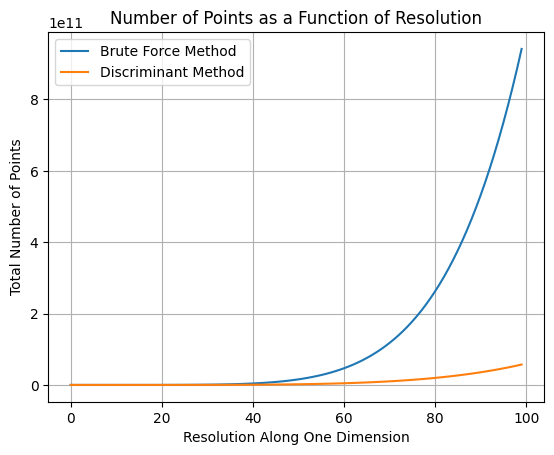

In [18]:
resolution = np.arange(100)
brute_force_points = resolution**6
discriminant_points = len(index_list)*resolution**5
plt.plot(resolution, brute_force_points, label='Brute Force Method')
plt.plot(resolution, discriminant_points, label='Discriminant Method')
plt.xlabel('Resolution Along One Dimension')
plt.ylabel('Total Number of Points')
plt.title('Number of Points as a Function of Resolution')
plt.legend()
plt.grid()
plt.show()